In [3]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/proyectoIA')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/proyectoIA


# **SONIDO RESPIRATORIO:Uso de grabaciones de audio para detectar enfermedades respiratorias**

AUTORES:

JAVIER ANDRES ADARME DAVILA - 2162923

EDISON CAMILO PORRAS MELGAREJO - 2163021

![texto alternativo](https://www.gaceta.mx/wp-content/uploads/2020/01/ENFERMEDADES.jpg)

# TIPOS DE ENFERMEDADES RESPIRATORIAS
1) URTI (URTICARIA):La urticaria puede causar una inflamación peligrosa en las vías respiratorias y dificultar la respiración.

2) HEALTHY: Persona saludable

3) Asthma: Persona con asma

4) COPD:Enfermedad pulmonar obstructiva crónica o COPD 

5) LRTI:Enfermedades de las vías respiratorias inferiores 

6) Bronchiectasis:Afección que daña las vías respiratorias de los pulmones y dificulta la expulsión de mucosidad.

7) Pneumonia: Persona con neumonia

8) Bronchiolitis (Bronquiolitis): Reacción bronquial inflamatoria en bebés y niños pequeños.

In [4]:
from datetime import datetime
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import math
!pip install librosa
import librosa as lb
import IPython.display as ipd
from sklearn import preprocessing
import librosa.display 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB    
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import *

import seaborn as sn
#import soundfile as sf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import sklearn
from  sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import os
import seaborn as sns
from os import listdir
from os.path import isfile, join
from sklearn.utils import class_weight
from collections import Counter
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#@title 2. LOAD LIB { display-mode: "form" }
#@markdown Here is important to change to GPU  
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install librosa

2.3.0


## VISUALIZACIÓN DE DATOS

Observamos el paciente con su correspondiente enfermedad

In [6]:

diag_csv = 'data_set_audios/patient_diagnosis.csv'
diagnosis = pd.read_csv(diag_csv, names=['pId', 'diagnosis'])
diagnosis.head(10)

pId diagnosis
0  101      URTI
1  102   Healthy
2  103    Asthma
3  104      COPD
4  105      URTI
5  106      COPD
6  107      COPD
7  108      LRTI
8  109      COPD
9  110      COPD

In [7]:
ds=diagnosis['diagnosis'].unique()#tipos de enfermedades
ds

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

# ANALISIS ESTADISTICO

In [8]:
database_root = "data_set_audios"#Guarda todo el dataset

In [9]:
patient_info = pd.read_csv(os.path.join(database_root, "demographic_info.txt"), names=['Patient', 'Age', 'Sex', 'BMI', 'Weight', 'Height'], delim_whitespace=True)#Informacion demografica
diagnostics = pd.read_csv(os.path.join(database_root, "patient_diagnosis.csv"), names=['Patient', 'Diagnosis'])# Enfermedad del paciente

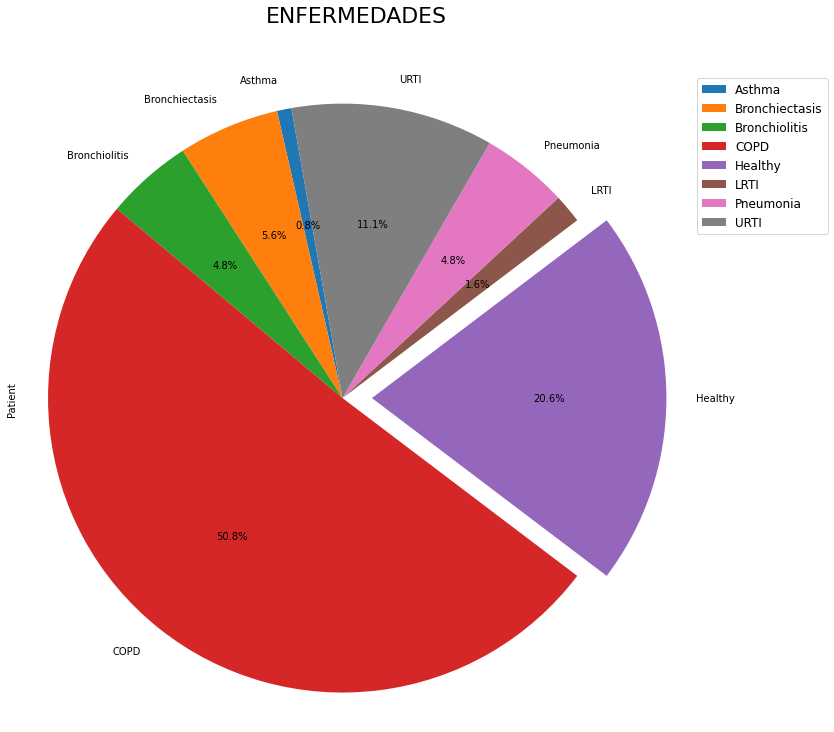

Total de datos en dataset:  126
Total de saludables: 26
Total de enfermos: 100


In [10]:
patient_info["Diagnosis"] = diagnostics[["Diagnosis"]]
disease_df = patient_info.groupby(['Diagnosis']).count()['Patient'] # Series
disease_df.plot.pie(figsize=(12, 12), explode=(0,0,0,0,0.1,0,0,0), startangle=100, autopct='%1.1f%%')
plt.axis('equal')
plt.title("ENFERMEDADES", fontsize=22, pad=50.0)
plt.legend(fontsize=12, loc='best', bbox_to_anchor=(1, 1));
plt.show()
print("Total de datos en dataset: ", patient_info['Diagnosis'].count())
print(f'Total de saludables: {patient_info.Diagnosis.value_counts().Healthy}')
print(f'Total de enfermos: {patient_info.Diagnosis.count() - patient_info.Diagnosis.value_counts().Healthy}')

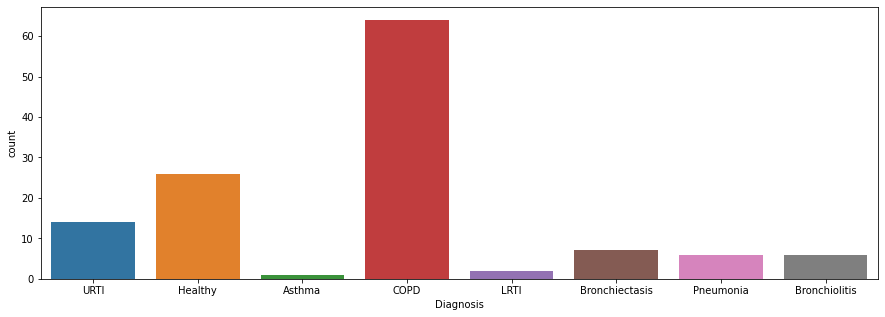

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(diagnostics['Diagnosis'])

Verificamos los audios del dataset

In [12]:
audio_text_loc = 'data_set_audios/audio_and_txt_files/audio_and_txt_files1'
files = [s.split('.')[0] for s in os.listdir(path = audio_text_loc) if '.txt' in s]
files

['160_1b3_Lr_mc_AKGC417L',
 '160_1b3_Pl_mc_AKGC417L',
 '160_1b3_Pr_mc_AKGC417L',
 '160_1b4_Al_mc_AKGC417L',
 '160_1b3_Tc_mc_AKGC417L',
 '160_1b4_Ar_mc_AKGC417L',
 '160_1b4_Lr_mc_AKGC417L',
 '160_1b4_Pl_mc_AKGC417L',
 '160_1b4_Pr_mc_AKGC417L',
 '160_1b4_Tc_mc_AKGC417L',
 '160_2b3_Lr_mc_AKGC417L',
 '160_2b4_Ar_mc_AKGC417L',
 '160_2b4_Pl_mc_AKGC417L',
 '160_2b4_Pr_mc_AKGC417L',
 '160_2b4_Tc_mc_AKGC417L',
 '161_1b1_Al_sc_Meditron',
 '161_1b1_Pl_sc_Meditron',
 '162_1b2_Al_mc_AKGC417L',
 '162_1b2_Ar_mc_AKGC417L',
 '162_1b2_Ll_mc_AKGC417L',
 '162_1b2_Lr_mc_AKGC417L',
 '162_1b2_Pl_mc_AKGC417L',
 '162_1b2_Pr_mc_AKGC417L',
 '162_1b2_Tc_mc_AKGC417L',
 '162_2b2_Al_mc_AKGC417L',
 '162_2b2_Ar_mc_AKGC417L',
 '162_2b2_Pl_mc_AKGC417L',
 '162_2b2_Pr_mc_AKGC417L',
 '162_2b2_Tc_mc_AKGC417L',
 '162_2b3_Al_mc_AKGC417L',
 '162_2b3_Ar_mc_AKGC417L',
 '162_2b3_Lr_mc_AKGC417L',
 '162_2b3_Pl_mc_AKGC417L',
 '162_2b3_Pr_mc_AKGC417L',
 '162_2b3_Tc_mc_AKGC417L',
 '162_2b4_Al_mc_AKGC417L',
 '162_2b4_Ar_mc_AKGC417L',
 

Se concatenan los dos dataset en estudio para tener los datos en una sola tabla

In [13]:
def tokenize_file(filename):
    return filename.split('_')

Tabla con las caractersiticas del audio

In [14]:
files_ = []
for f in files:
    df = pd.read_csv(audio_text_loc + '/' + f + '.txt', sep='\t', names=['start', 'end', 'crackles', 'wheezes'])
    df['filename'] = f
    #get filename features
    f_features = tokenize_file(f)
    df['pId'] = f_features[0]
    df['ac_mode'] = f_features[3]
    
    files_.append(df)
    
files_df = pd.concat(files_)
files_df.reset_index()
files_df.head()

start     end  crackles  wheezes                filename  pId ac_mode
0   1.862   5.718         0        1  160_1b3_Lr_mc_AKGC417L  160      mc
1   5.718   9.725         0        1  160_1b3_Lr_mc_AKGC417L  160      mc
2   9.725  13.614         0        1  160_1b3_Lr_mc_AKGC417L  160      mc
3  13.614  17.671         0        1  160_1b3_Lr_mc_AKGC417L  160      mc
4  17.671  19.541         0        0  160_1b3_Lr_mc_AKGC417L  160      mc

In [15]:
files_df['pId'] = files_df['pId'].astype('float64')
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   float64
 6   ac_mode   6898 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 431.1+ KB


Tabla concatenada de los datos

In [16]:
files_df = pd.merge(files_df, diagnosis, on='pId')
files_df.head()

start     end  crackles  ...    pId ac_mode  diagnosis
0   1.862   5.718         0  ...  160.0      mc       COPD
1   5.718   9.725         0  ...  160.0      mc       COPD
2   9.725  13.614         0  ...  160.0      mc       COPD
3  13.614  17.671         0  ...  160.0      mc       COPD
4  17.671  19.541         0  ...  160.0      mc       COPD

[5 rows x 8 columns]

In [17]:
files_df.shape

(6898, 8)

In [18]:
del(files_df['ac_mode'])

Confusion-Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4efbf2b70>,
      dtype=object)

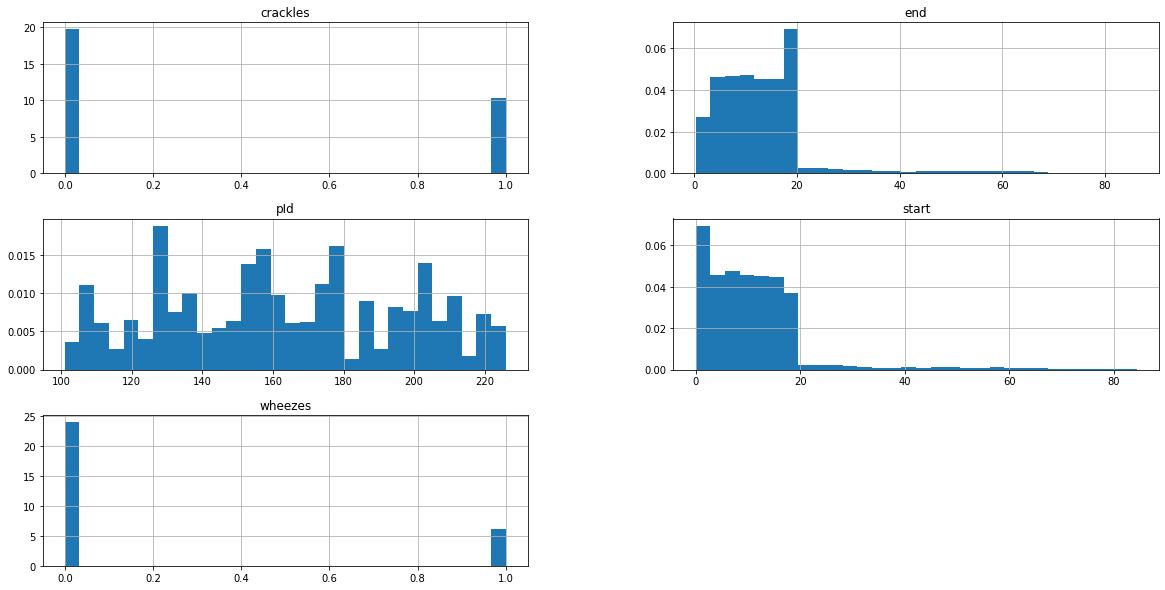

In [19]:
files_df.hist(bins=30,  density=True, figsize=(20,10))

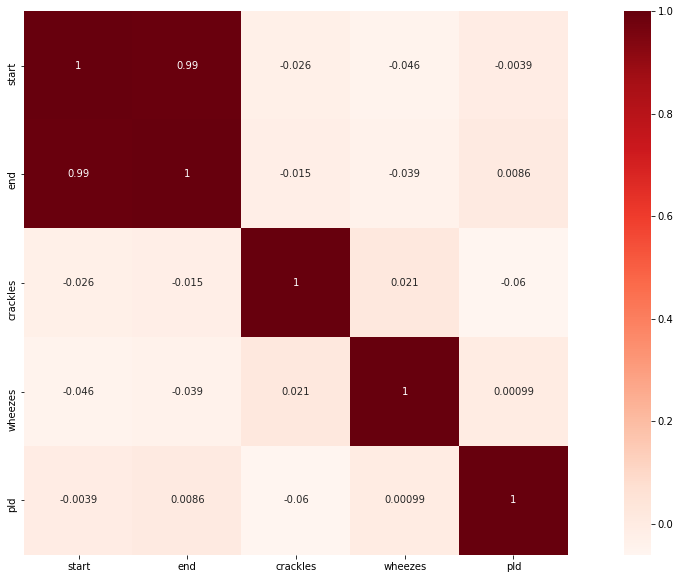

In [20]:
import seaborn as sns

plt.figure(figsize = (20,10))
sns.heatmap(files_df.corr(), square=True, annot=True, cmap="Reds")

# PREPROCESSING

In [21]:
labels = files_df.iloc[:, -1]
encoder = preprocessing.LabelEncoder()

In [22]:
y = encoder.fit_transform(labels)#se obtienen los labels 
print(y.shape,np.unique(y))

(6898,) [0 1 2 3 4 5 6 7]


In [23]:
# Dropping de columnas innecesarias
data = files_df.drop(['filename'],axis=1)

In [24]:
scaler = preprocessing.StandardScaler()#Se estandarizan las caracteristicas Z=(x-u)/s
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [25]:
#guardamos los valores de las medias y desviaciones estándar
np.save("medias", scaler.mean_)
np.save("desvest", scaler.scale_)

In [26]:
data.shape

(6898, 6)

In [27]:
print(X.shape,y.shape)

(6898, 5) (6898,)


# Split data on training (80% ) and test (20%).


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [30]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    #stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    #plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

RANDOM FOREST y NAIVE GAUSSIAN

In [31]:
rf = RandomForestClassifier(n_estimators=200)
g = GaussianNB() 
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
rf.fit(Xtr,ytr)
g.fit(Xtr,ytr)
rf.fit(X_train,y_train)
g.fit(X_train,y_train)
print("Random Forest Accuracy :",rf.score(X_test,y_test))
print("Naive Bayes Accuracy :",g.score(X_test,y_test))
print("Shape :",X.shape)
X2 = PCA(n_components=5).fit_transform(X)
print ("shape after PCA:", X2.shape)
srf = cross_val_score(GaussianNB(), X2, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("RF accuracy %.3f (+/- %.5f)"%(np.mean(srf), np.std(srf)))
s = cross_val_score(GaussianNB(), X2, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("GNB accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

predictions=rf.predict(X_test)
#rf_model_cm = confusion_matrix(y_test, predictions)
#rf_model_df_cm = pd.DataFrame(rf_model_cm)  
#plt.figure(figsize = (20,14))  
#sn.set(font_scale=1.4) #for label size  
#sn.heatmap(rf_model_df_cm, annot=True, annot_kws={"size": 12}) # font size  
#plt.show()

Random Forest Accuracy : 0.9231884057971015
Naive Bayes Accuracy : 0.6144927536231884
Shape : (6898, 5)
shape after PCA: (6898, 5)
RF accuracy 0.802 (+/- 0.01195)
GNB accuracy 0.801 (+/- 0.00911)


 RANDOM FOREST ACCURACY=92%
 
 NAIVE BAYES ACCURACY=61%





2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Gaussian')

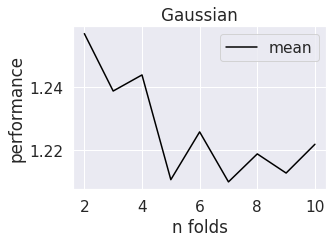

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")


2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'RANDOM-FOREST')

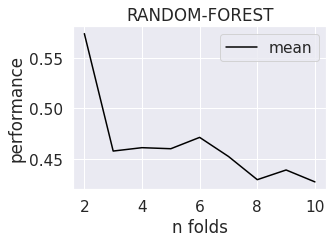

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(RandomForestClassifier())
plt.title("RANDOM-FOREST")

In [33]:
from sklearn.naive_bayes import GaussianNB   
estGNB = GaussianNB()
s1GNB = cross_val_score(estGNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s1GNB), np.std(s1GNB)))
s2GNB = cross_val_score(estGNB, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s2GNB), np.std(s2GNB)))
s3GNB = cross_val_score(estGNB, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s3GNB), np.std(s3GNB)))

accuracy 0.592 (+/- 0.02870)
tpr      0.000 (+/- 0.00000)
tnr      nan (+/- nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **

# Decision Tree Clasiffier

In [34]:
from sklearn.tree import DecisionTreeClassifier
estDTC = DecisionTreeClassifier()
s1DTC = cross_val_score(estDTC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s1DTC), np.std(s1DTC)))
s2DTC = cross_val_score(estDTC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s2DTC), np.std(s2DTC)))
s3DTC = cross_val_score(estDTC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s3DTC), np.std(s3DTC)))

accuracy 0.988 (+/- 0.00495)
tpr      0.929 (+/- 0.09406)
tnr      nan (+/- nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **

DECISION TREE CLASSIFIER=98%

2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'DECISION-TREE')

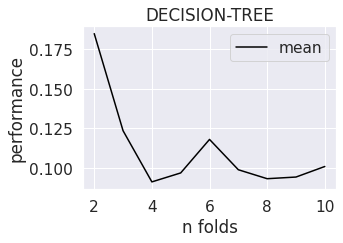

In [ ]:

plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(DecisionTreeClassifier())
plt.title("DECISION-TREE")

## Support Vector Machine

In [35]:
from sklearn.svm import SVC
estSVC = SVC(gamma='auto')
s1SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s1SVC), np.std(s1SVC)))
s2SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s2SVC), np.std(s2SVC)))
s3SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s3SVC), np.std(s3SVC)))

accuracy 0.833 (+/- 0.01080)
tpr      0.000 (+/- 0.00000)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **

tnr      nan (+/- nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


SUPPORT VECTOR MACHINE=83%

# Prueba con audios

In [36]:

audio_path='data_set_audios/audio_and_txt_files/audio/101_1b1_Pr_sc_Meditron.wav'
x , sr = librosa.load(audio_path)
print(type(x),type(sr))
print(x.shape)
print(sr)

<class 'numpy.ndarray'> <class 'int'>
(441000,)
22050


In [37]:
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

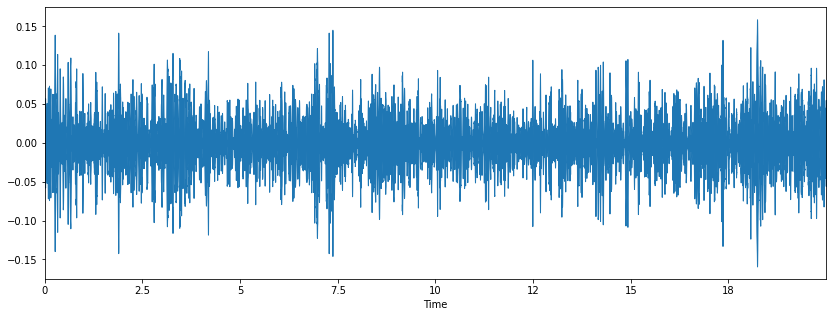

In [38]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr);

MEL-FRECUENCY SPECTOGRAM

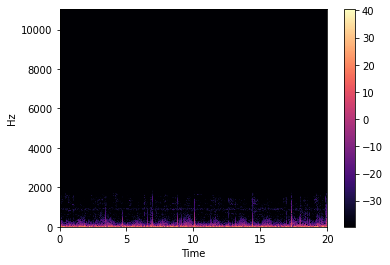

In [39]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz');
plt.colorbar();

## Using Keras

In [40]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history=model.fit(X_train, y_train,batch_size=64 ,epochs=800, verbose=1,  validation_data=(X_test,y_test))

Epoch 1/800
87/87 [==============================] - 0s 3ms/step - loss: 0.1294 - accuracy: 0.9538 - val_loss: 0.8023 - val_accuracy: 0.8986
Epoch 2/800
87/87 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9522 - val_loss: 0.8043 - val_accuracy: 0.8899
Epoch 3/800
87/87 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9513 - val_loss: 0.7448 - val_accuracy: 0.8971
Epoch 4/800
87/87 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9498 - val_loss: 0.7296 - val_accuracy: 0.8928
Epoch 5/800
87/87 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9532 - val_loss: 0.7009 - val_accuracy: 0.8957
Epoch 6/800
87/87 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9583 - val_loss: 0.7290 - val_accuracy: 0.8993
Epoch 7/800
87/87 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9482 - val_loss: 0.7606 - val_accuracy: 0.8935
Epoch 8/800
8

In [48]:
test_loss, test_acc = model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 1.3624 - accuracy: 0.9094


In [49]:
print('test_acc: ',test_acc)
print('test_loss: ',test_loss)

test_acc:  0.9094203114509583
test_loss:  1.362414836883545


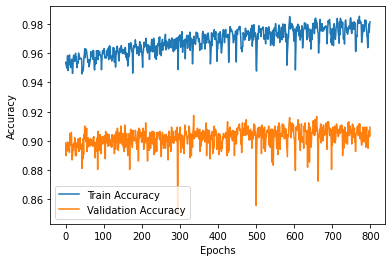

In [50]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

COMPARACIÓN DE LOS DIFERENTES CLASIFICADORES

In [ ]:
from IPython.display import display, HTML
table = [["Naive Gaussian Bayes", np.mean(s1GNB)],
         ["Decision Tree Classifier",np.mean(s1DTC)],
         ["Random Forest Classifier",np.mean(s2DTC)],
         ["Support Vector Machine",np.mean(s1SVC)],
         ["Keras Sequential Model",test_acc]]
compDF = pd.DataFrame(table, columns=["Clasificador", "Accuracy"]);

In [ ]:
print(table)

[['Naive Gaussian Bayes', 0.5932203781998696], ['Decision Tree Classifier', 0.9885469384320903], ['Random Forest Classifier', 0.9154151404151405], ['Support Vector Machine', 0.8330024610336342], ['Keras Sequential Model', 0.9159420132637024]]


## CONCLUSIONES

- La toma de muestras para la detección de enfermedades respiratorias se puede realizar a través de grabaciones de la respiración del paciente para posteriormente analizarlas con ayuda de la inteligencia artificial y determinar en forma rapida y precisa la enfermedad que padece y poder tomar decisiones sobre que tratamiento se le debe dar al paciente para combatir la enfermedad.

- La calidad en la toma de las muestras influyen en gran medida en la calidad de los datos, es por esto que al utilizar diferentes estimadores la precisión de los mismos puede variar en la clasificación.

- Se observo que el mejor método de clasificación fue Decisión Tree Classifier (98%).

- La Inteligencia artificial (AI) ha demostrado un gran desempeño en los diferentes campos de acción en el que sea util su utilización optimizando metodos antiguos y tardios por unos mas evolucionados beneficiando a todo aquel que se decida en abordar esta rama en constante evolución.
